# Setup

## Evaluations

In [1]:
import numpy as np

def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

## Variables

- id : 샘플 아이디
- title : 제조사 모델명
- odometer : 주행 거리
- location : 판매처(나이지리아 도시)
- isimported : 현지 사용 여부
- engine : 엔진 종류
- transmission : 트랜스미션 종류
- fuel : 연료 종류
- paint : 페인트 색상
- year : 제조년도
- target : 자동차 가격

# EDA 

## library

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['font.family'] = 'Malgun Gothic'

import seaborn as sns 

## load data 

In [3]:
pd.read_csv('dataset/train.csv')

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000
...,...,...,...,...,...,...,...,...,...,...,...
1010,1010,Toyota Corolla,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2014,5415000
1011,1011,Toyota Camry,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Silver,2011,3615000
1012,1012,Toyota Camry,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2011,3415000
1013,1013,Lexus GX 460,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Gold,2013,14315000


In [4]:
train = pd.read_csv('dataset/train.csv', index_col = 'id')
test = pd.read_csv('dataset/test.csv', index_col = 'id')
submission = pd.read_csv('dataset/sample_submission.csv', index_col = 'id')

In [5]:
print(train.shape)
print(test.shape)

(1015, 10)
(436, 9)


In [6]:
train.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
id,,,,,,,,,,
0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


## feature summary

In [7]:
def resumetable(df) :
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index' : '피처'})
    summary['결측값 수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['1번째 값'] = df.loc[0].values
    summary['2번째 값'] = df.loc[1].values
    summary['3번째 값'] = df.loc[2].values
    
    return summary

In [8]:
resumetable(train)

데이터셋 형상 : (1015, 10)


,피처,데이터 타입,결측값 수,고윳값 개수,1번째 값,2번째 값,3번째 값
0,title,object,0,203,Toyota RAV 4,Toyota Land Cruiser,Land Rover Range Rover Evoque
1,odometer,int64,0,985,18277,10,83091
2,location,object,0,13,Lagos,Lagos,Lagos
3,isimported,object,0,3,Foreign Used,New,Foreign Used
4,engine,object,0,8,4-cylinder(I4),4-cylinder(I4),6-cylinder(V6)
5,transmission,object,0,2,automatic,automatic,automatic
6,fuel,object,0,2,petrol,petrol,petrol
7,paint,object,0,76,Red,Black,Red
8,year,int64,0,33,2016,2019,2012
9,target,int64,0,394,13665000,33015000,9915000


**결측이 없는 데이터**

### 제조사

In [9]:
train['title']

id
0                        Toyota RAV 4
1                 Toyota Land Cruiser
2       Land Rover Range Rover Evoque
3                        Lexus ES 350
4                        Toyota Venza
                    ...              
1010                   Toyota Corolla
1011                     Toyota Camry
1012                     Toyota Camry
1013                     Lexus GX 460
1014                           DAF CF
Name: title, Length: 1015, dtype: object

In [10]:
np.unique([s.split()[0] for s in train['title']])

array(['ALPINA', 'Acura', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'DAF',
       'Dodge', 'Ford', 'GAC', 'GMC', 'Honda', 'Hyundai', 'IVECO', 'IVM',
       'Infiniti', 'Isuzu', 'Iveco', 'JMC', 'Jaguar', 'Jeep', 'Kia',
       'Land', 'Lexus', 'Lincoln', 'MAN-VOLKSWAGEN', 'MINI', 'Mack',
       'Man', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz/52', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Pontiac', 'Porsche', 'Rolls-Royce', 'Scania',
       'Toyota', 'Volkswagen', 'Volvo'], dtype='<U16')

브랜드명 + 제품명으로 되어있기 때문에 split을 이용해서 제조사명 구한다.
> 이 때 Land Rover은 브랜드명이 Land가 아니기 때문에 변환해줘야 함 

In [11]:
train['title'] = train['title'].str.replace('Land Rover' ,'LandRover')

In [12]:
train['maker'] = [s[:len(s.split()[0])] for s in train['title']]

train.drop('title', axis = 1, inplace = True)

In [13]:
resumetable(train)

데이터셋 형상 : (1015, 10)


,피처,데이터 타입,결측값 수,고윳값 개수,1번째 값,2번째 값,3번째 값
0,odometer,int64,0,985,18277,10,83091
1,location,object,0,13,Lagos,Lagos,Lagos
2,isimported,object,0,3,Foreign Used,New,Foreign Used
3,engine,object,0,8,4-cylinder(I4),4-cylinder(I4),6-cylinder(V6)
4,transmission,object,0,2,automatic,automatic,automatic
5,fuel,object,0,2,petrol,petrol,petrol
6,paint,object,0,76,Red,Black,Red
7,year,int64,0,33,2016,2019,2012
8,target,int64,0,394,13665000,33015000,9915000
9,maker,object,0,42,Toyota,Toyota,LandRover


## 이진 변수
- transmission, fuel

In [14]:
bin_features = ['transmission', 'fuel']

In [15]:
# automatic : 0, manual : 1로 인코딩
train['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [16]:
# petrol : 0, diesel : 1로 인코딩
train['fuel'].unique()

array(['petrol', 'diesel'], dtype=object)

In [17]:
train['transmission'] = train['transmission'].map({'automatic' : 0, 'manual' : 1})
train['fuel'] = train['fuel'].map({'petrol' : 0, 'diesel' : 1})

## 명목형 변수
- location, isimported, engine, paint, maker

### location

In [18]:
train['location'].unique()

array(['Lagos ', 'Lagos', 'Abuja', 'Lagos State', 'Ogun', 'FCT', 'Accra',
       'other', 'Abuja ', 'Abia State', 'Adamawa ', 'Abia', 'Ogun State'],
      dtype=object)

판매지역은 명목형으로 고려, 원 핫 인코딩을 수행

### isimported

In [19]:
train['isimported'].unique()

array(['Foreign Used', 'New ', 'Locally used'], dtype=object)

현지 사용 여부는 new $\rightarrow$ Locally used $\rightarrow$ Foreign Used  순으로 인코딩해서 순서형 범주로 고려하는 것이 좋아보임 

In [20]:
train['isimported'] = train['isimported'].map({'New ' : 0,
                                               'Foreign Used' : 1,
                                               'Locally used' : 2})

In [21]:
train

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker
id,,,,,,,,,,
0,18277,Lagos,1,4-cylinder(I4),0,0,Red,2016,13665000,Toyota
1,10,Lagos,0,4-cylinder(I4),0,0,Black,2019,33015000,Toyota
2,83091,Lagos,1,6-cylinder(V6),0,0,Red,2012,9915000,LandRover
3,91524,Lagos,1,4-cylinder(I4),0,0,Gray,2007,3815000,Lexus
4,94177,Lagos,1,6-cylinder(V6),0,0,Red,2010,7385000,Toyota
...,...,...,...,...,...,...,...,...,...,...
1010,46768,Lagos,1,4-cylinder(I4),0,0,Black,2014,5415000,Toyota
1011,31600,Abuja,1,4-cylinder(I4),0,0,Silver,2011,3615000,Toyota
1012,96802,Abuja,1,4-cylinder(I4),0,0,Black,2011,3415000,Toyota


### engine

In [22]:
train['engine'].unique()

array(['4-cylinder(I4)', '6-cylinder(V6)', '8-cylinder(V8)',
       '6-cylinder(I6)', '4-cylinder(H4)', '5-cylinder(I5)',
       '3-cylinder(I3)', '2-cylinder(I2)'], dtype=object)

엔진 기통수가 많을수록 출력이 좋아질 것으로 판단, 순서형 범주로 고려

In [23]:
train['engine'] = [s[:1] for s in train['engine']]
train['engine'] = train['engine'].astype(int)

### paint

In [24]:
train['paint'].unique()

array(['Red', 'Black', 'Gray', 'White', 'Blue', 'Redl', 'Silver',
       ' Black/Red', 'Deep Blue', 'Dark Grey', 'Brown', 'Grey', 'Green',
       'Purple', 'Gold', 'Dark Blue', 'Milk', 'Midnight Black Metal',
       'Deep blue', 'green', 'Beige', 'Blue ', 'Silver ', 'red', 'white',
       'Dark Ash', 'Black ', 'orange', 'Cream', 'blue', 'Dark gray',
       'Sliver', 'White orchild pearl', 'Dark Green', 'Gold ', 'Yellow',
       'Grey ', 'Light Gold', 'White ', 'Wine', 'white-blue',
       'Magnetic Gray', 'WHITE', 'yellow', 'Gray ', 'Dark silver ',
       'Dark blue ', 'SILVER', 'Black.', 'WINE', 'Silver/grey',
       'Ink blue', 'Light blue', 'Sky blue', 'Gery', 'Pale brown',
       'Whine ', 'Cream ', 'Black and silver', 'DARK GREY', 'Dark ash',
       'Light silver ', 'BLACK', 'GOLD', 'Black sand pearl', 'Off white',
       'Ash', 'Maroon', 'Navy blue', 'Super White', ' Black',
       'Ash and black', 'Green ', 'Magnetic Gray Metallic', 'Skye blue',
       'Off white l'], dtype=obje

선호하는 색상이 있을 것으로 판단되지만 시각화 후에 결정

### 제조사

In [25]:
train['maker'].unique()

array(['Toyota', 'LandRover', 'Lexus', 'Pontiac', 'Ford', 'Honda',
       'Volvo', 'BMW', 'Infiniti', 'Mercedes-Benz', 'Hyundai', 'Jaguar',
       'Mitsubishi', 'Nissan', 'Mack', 'Chevrolet', 'Mazda', 'Lincoln',
       'Kia', 'Volkswagen', 'Acura', 'DAF', 'Man', 'Isuzu', 'IVM',
       'Porsche', 'MINI', 'Dodge', 'GMC', 'Iveco', 'Scania', 'GAC',
       'IVECO', 'Peugeot', 'Rolls-Royce', 'MAN-VOLKSWAGEN', 'Jeep',
       'ALPINA', 'Bentley', 'JMC', 'Mercedes-Benz/52', 'Audi'],
      dtype=object)

제조사별 가격 차이가 있을 것으로 판단되지만 시각화 후에 결정

In [26]:
nom_features = ['location', 'paint', 'maker']
ord_features = ['isimported', 'engine']

## 수치형 변수
- odometer, year

## 타깃값

<AxesSubplot:xlabel='target', ylabel='Count'>

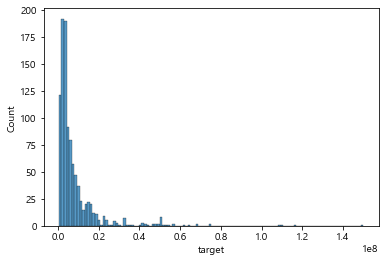

In [66]:
sns.histplot(x = 'target', data = train)

<AxesSubplot:xlabel='target', ylabel='Count'>

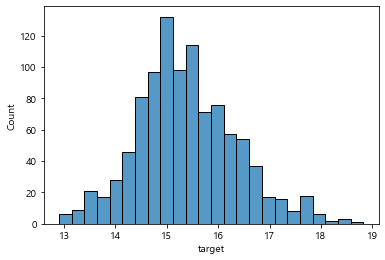

In [67]:
sns.histplot(x = np.log1p(train['target']))

In [28]:
print('min : ', train[train['target'] == np.min(train['target'])]['maker'].values,
      np.min(train['target']))
print('max : ', train[train['target'] == np.max(train['target'])]['maker'].values,
      np.max(train['target']))

min :  ['Volkswagen' 'Honda' 'Volkswagen'] 400000
max :  ['Rolls-Royce'] 150015008


# Visualization

<AxesSubplot:xlabel='target', ylabel='maker'>

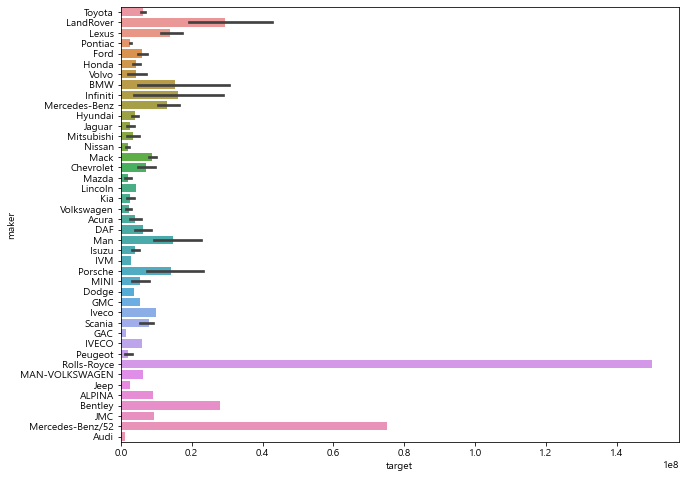

In [29]:
plt.figure(figsize = (10, 8))
sns.barplot(y = 'maker', x = 'target', data = train)

## 이진 변수

In [30]:
bin_features

['transmission', 'fuel']

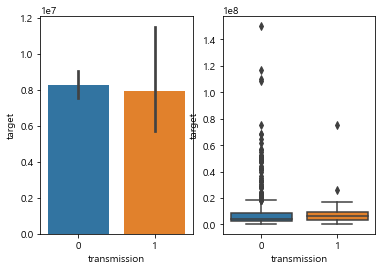

In [31]:
fig, ax = plt.subplots(1, 2)
sns.barplot(x = 'transmission', y = 'target', data = train, ax = ax[0])
sns.boxplot(x = 'transmission', y = 'target', data = train, ax = ax[1])
plt.show()

가격을 예측하는 데 있어 중요하지 않아보임 
> 삭제를 고려

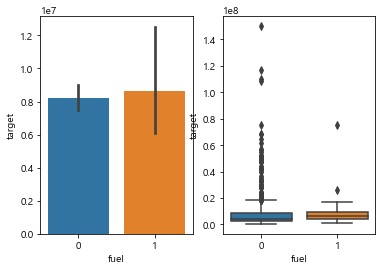

In [32]:
fig, ax = plt.subplots(1, 2)
sns.barplot(x = 'fuel', y = 'target', data = train, ax = ax[0])
sns.boxplot(x = 'fuel', y = 'target', data = train, ax = ax[1])
plt.show()

In [33]:
train['trans_fuel'] = train['transmission'].astype(str) + train['fuel'].astype(str)

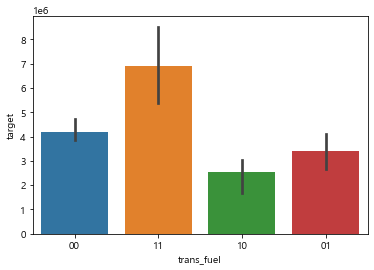

In [34]:
sns.barplot(x = 'trans_fuel', y = 'target', data = train,
            estimator = np.median)
plt.show()

수동 변속기와 가솔린 연료의 조합의 경우 선호도가 낮다. 

그리고 자동 변속기의 경우 승차감이 좋은 가솔린 차가 선호도가 더 높다.

> 자동변속기+가솔린, 수동변속기+디젤의 경우 가격이 비슷하게 높음 

## 명목형 변수

In [35]:
nom_features

['location', 'paint', 'maker']

In [45]:
train['location'] = train['location'].replace({'Lagos ' : 'Lagos',
                                           'Lagos State' : 'Lagos',
                                           'Abuja ' : 'Abuja',
                                           'Abia State' : 'Abia',
                                           'Ogun State' : 'Ogun'})

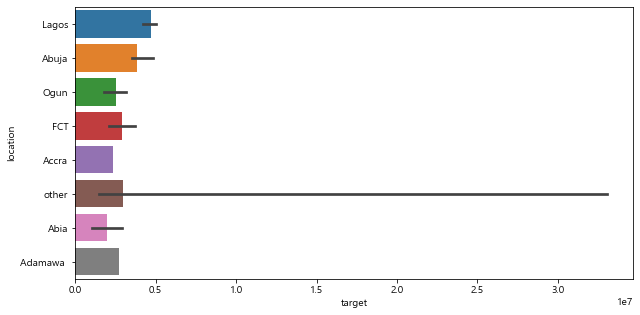

In [47]:
plt.figure(figsize = (10, 5))
sns.barplot(y = 'location', x = 'target', data = train,
            estimator = np.median)
plt.show()

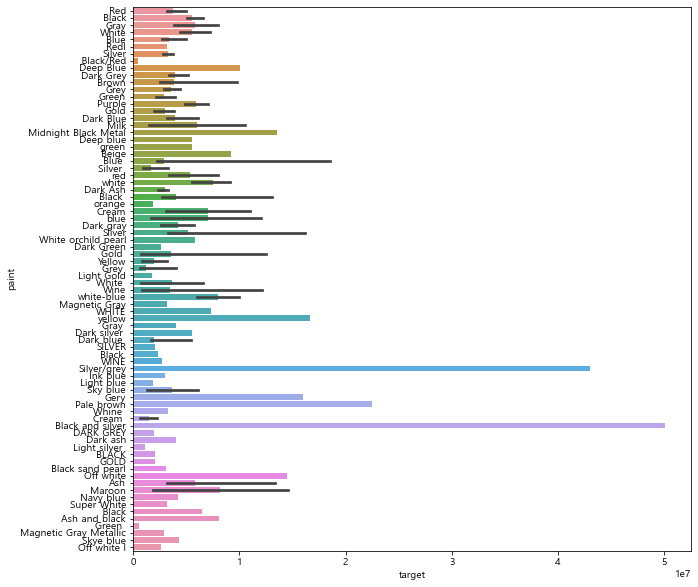

In [50]:
plt.figure(figsize = (10, 10))
sns.barplot(y = 'paint', x = 'target', data = train,
            estimator = np.median)
plt.show()

In [53]:
train['paint'].unique()

array(['Red', 'Black', 'Gray', 'White', 'Blue', 'Redl', 'Silver',
       ' Black/Red', 'Deep Blue', 'Dark Grey', 'Brown', 'Grey', 'Green',
       'Purple', 'Gold', 'Dark Blue', 'Milk', 'Midnight Black Metal',
       'Deep blue', 'green', 'Beige', 'Blue ', 'Silver ', 'red', 'white',
       'Dark Ash', 'Black ', 'orange', 'Cream', 'blue', 'Dark gray',
       'Sliver', 'White orchild pearl', 'Dark Green', 'Gold ', 'Yellow',
       'Grey ', 'Light Gold', 'White ', 'Wine', 'white-blue',
       'Magnetic Gray', 'WHITE', 'yellow', 'Gray ', 'Dark silver ',
       'Dark blue ', 'SILVER', 'Black.', 'WINE', 'Silver/grey',
       'Ink blue', 'Light blue', 'Sky blue', 'Gery', 'Pale brown',
       'Whine ', 'Cream ', 'Black and silver', 'DARK GREY', 'Dark ash',
       'Light silver ', 'BLACK', 'GOLD', 'Black sand pearl', 'Off white',
       'Ash', 'Maroon', 'Navy blue', 'Super White', ' Black',
       'Ash and black', 'Green ', 'Magnetic Gray Metallic', 'Skye blue',
       'Off white l'], dtype=obje

In [62]:
train['paint'] = [s.lower() for s in train['paint']]
train['paint'] = [s.strip() for s in train['paint']]
train['paint'] = [s.replace('.', '') for s in train['paint']]
train['paint'] = [s.replace('off white l', 'off white') for s in train['paint']]
train['paint'] = [s.replace('skye', 'sky') for s in train['paint']]
train['paint'] = [s.replace('redl', 'red') for s in train['paint']]

train['paint'].unique()

array(['red', 'black', 'gray', 'white', 'blue', 'silver', 'black/red',
       'deep blue', 'dark grey', 'brown', 'grey', 'green', 'purple',
       'gold', 'dark blue', 'milk', 'midnight black metal', 'beige',
       'dark ash', 'orange', 'cream', 'dark gray', 'sliver',
       'white orchild pearl', 'dark green', 'yellow', 'light gold',
       'wine', 'white-blue', 'magnetic gray', 'dark silver',
       'silver/grey', 'ink blue', 'light blue', 'sky blue', 'gery',
       'pale brown', 'whine', 'black and silver', 'light silver',
       'black sand pearl', 'off white', 'ash', 'maroon', 'navy blue',
       'super white', 'ash and black', 'magnetic gray metallic'],
      dtype=object)

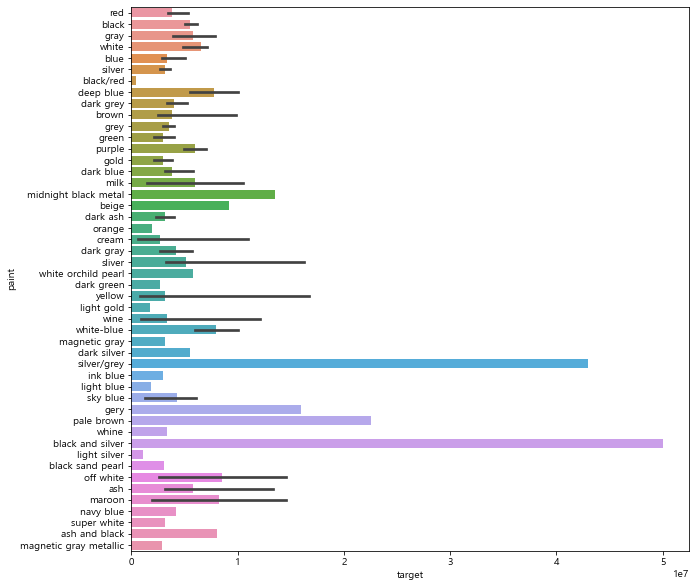

In [64]:
plt.figure(figsize = (10, 10))
sns.barplot(y = 'paint', x = 'target', data = train,
            estimator = np.median)
plt.show()

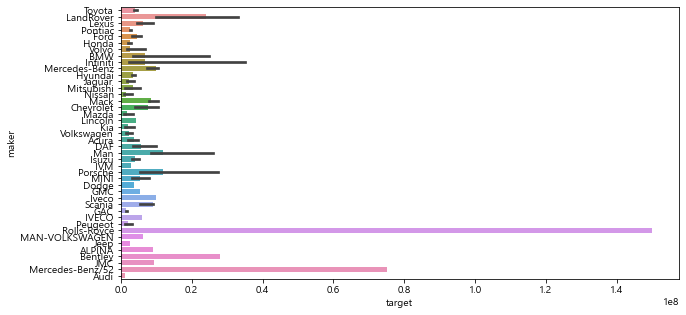

In [63]:
plt.figure(figsize = (10, 5))
sns.barplot(y = 'maker', x = 'target', data = train,
            estimator = np.median)
plt.show()

## 순서형 변수

In [41]:
ord_features 

['isimported', 'engine']

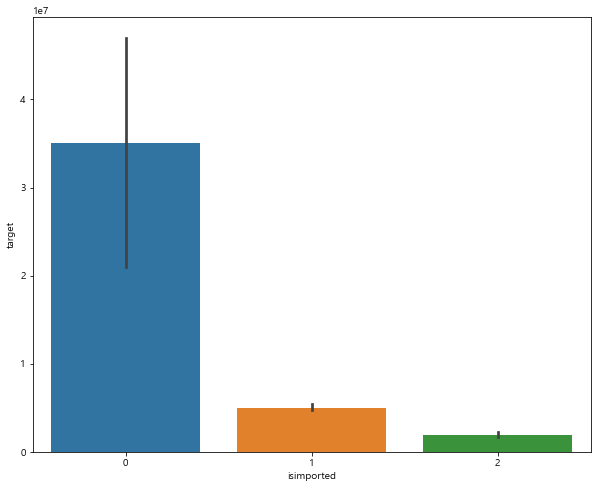

In [42]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'isimported', y = 'target', data = train,
            estimator = np.median)
plt.show()

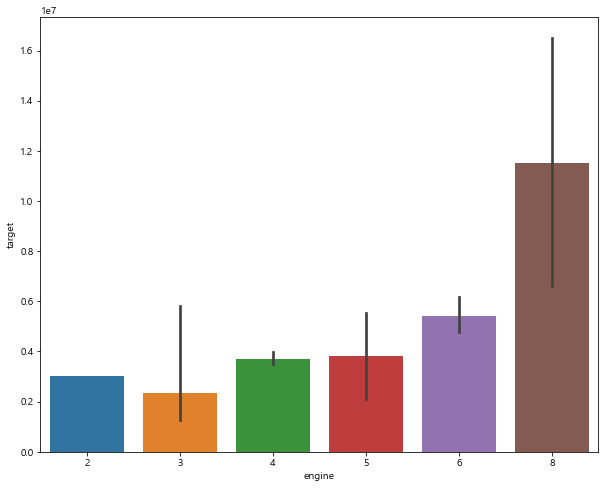

In [43]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'engine', y = 'target', data = train,
            estimator = np.median)
plt.show()

In [44]:
train[train['maker'] == 'Audi']

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker,trans_fuel
id,,,,,,,,,,,
957,678325,Lagos,2,4,1,1,white,1994,1215000,Audi,11


## 수치형 변수

<AxesSubplot:xlabel='odometer', ylabel='target'>

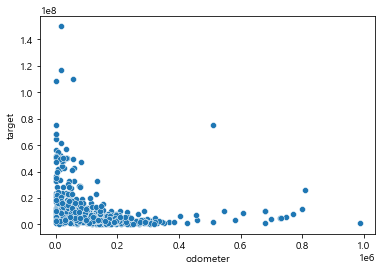

In [68]:
sns.scatterplot(x = 'odometer', y = 'target', data = train)

In [70]:
train['logy'] = np.log(train['target'])

<AxesSubplot:xlabel='odometer', ylabel='logy'>

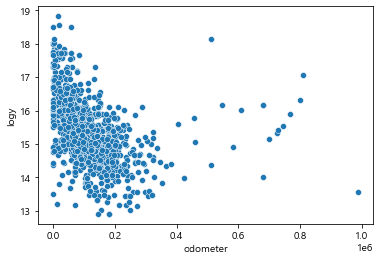

In [71]:
sns.scatterplot(x = 'odometer', y = 'logy', data = train)

In [79]:
np.sort(train[train['year']>=1900]['year'])

array([1980, 1982, 1985, ..., 2020, 2020, 2020], dtype=int64)

In [77]:
train[train['year'] < 1980]

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker,trans_fuel,logy
id,,,,,,,,,,,,
415,403461,Lagos,2,4,1,1,white,1218,6015000,Mercedes-Benz,11,15.609767
827,510053,Lagos,2,6,1,1,white,1217,75015000,Mercedes-Benz/52,11,18.133199


In [81]:
np.max(train['year'])

2020

In [92]:
train['year'] = train['year'].replace({1218 : 1998, 1217 : 1997})

In [93]:
train['year_diff'] = [2020-s for s in train['year']]

<AxesSubplot:xlabel='year_diff', ylabel='logy'>

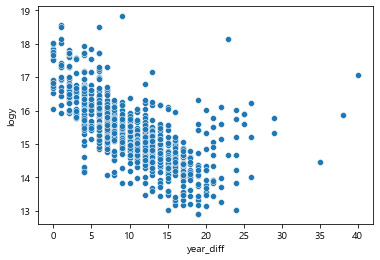

In [94]:
sns.scatterplot(x = 'year_diff', y = 'logy', data = train)

# 비싼 차량의 가격

In [108]:
train['rank'] = train['target'].rank(ascending = False)
train['rank'] = train['rank'].astype(int)

In [111]:
train[train['maker'] == 'Rolls-Royce']

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker,trans_fuel,logy,year_diff,rank
id,,,,,,,,,,,,,,
597,16069,Lagos,2,4,0,0,black,2011,150015008,Rolls-Royce,00,18.826246,9,1


In [113]:
train[train['rank'] < 20].sort_values(by = 'target', ascending = False)

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker,trans_fuel,logy,year_diff,rank
id,,,,,,,,,,,,,,
597,16069,Lagos,2,4,0,0,black,2011,150015008,Rolls-Royce,00,18.826246,9,1
341,18720,Lagos,1,8,0,0,grey,2019,117015000,LandRover,00,18.577813,1,2
569,55530,Abuja,1,8,0,0,black,2014,110015000,Lexus,00,18.516127,6,3
736,20,Lagos,0,8,0,0,black,2019,108690000,Mercedes-Benz,00,18.504010,1,4
827,510053,Lagos,2,6,1,1,white,1997,75015000,Mercedes-Benz/52,11,18.133199,23,5
672,1931,Abuja,0,8,0,0,blue,2019,75015000,Lexus,00,18.133199,1,5
332,90,Lagos,1,8,0,0,black,2019,68265000,Mercedes-Benz,00,18.038908,1,7
432,467,Lagos,0,4,0,0,black,2020,68265000,BMW,00,18.038908,0,7
423,47,Lagos,0,4,0,0,black,2020,65015000,Toyota,00,17.990129,0,9


In [114]:
len(train[train['odometer']<20000])/len(train)

0.10935960591133005

In [115]:
train['low_distance'] = [1 if s < 20000 else 0 for s in train['odometer']]

<AxesSubplot:xlabel='low_distance', ylabel='target'>

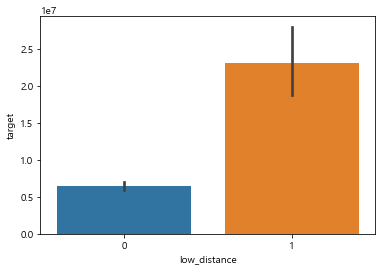

In [116]:
sns.barplot(x = 'low_distance', y = 'target', data = train)

In [118]:
train['pop_maker'] = [1 if s in train[train['rank'] < 20]['maker'].unique() else 0 for s in train['maker']]

<AxesSubplot:xlabel='pop_maker', ylabel='target'>

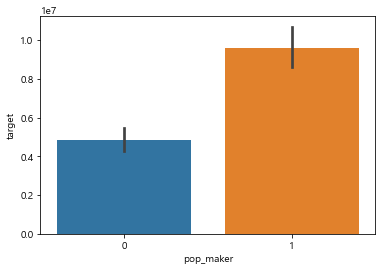

In [119]:
sns.barplot(x = 'pop_maker', y = 'target', data = train)

In [122]:
train['less3y'] = [1 if s < 3 else 0 for s in train['year_diff']]

<AxesSubplot:xlabel='less3y', ylabel='target'>

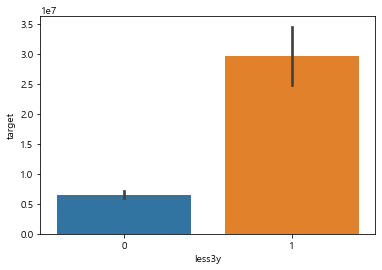

In [123]:
sns.barplot(x = 'less3y', y = 'target', data = train)

<AxesSubplot:xlabel='pop_color', ylabel='target'>

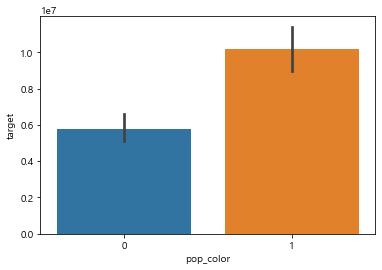

In [137]:
train['pop_color'] = [1 if ('white' in s or 'black' in s or 'blue' in s) else 0 for s in train['paint']]
sns.barplot(x = 'pop_color', y = 'target', data = train)

<AxesSubplot:xlabel='loc_lagos', ylabel='target'>

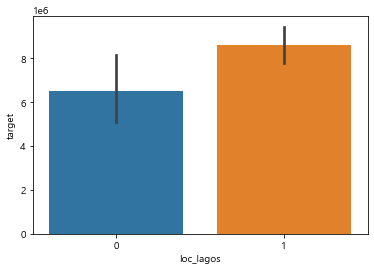

In [144]:
train['loc_lagos'] = [1 if s == 'Lagos' else 0 for s in train['location']]
sns.barplot(x = 'loc_lagos', y = 'target', data = train)

<AxesSubplot:xlabel='thisyear', ylabel='target'>

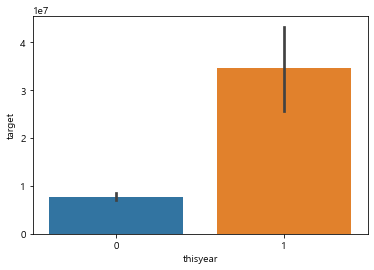

In [145]:
train['thisyear'] = [1 if s == 2020 else 0 for s in train['year']]
sns.barplot(x = 'thisyear', y = 'target', data = train)

## 200000000 이상

In [146]:
train['over20m'] = [1 if s >= 20000000 else 0 for s in train['target']]

In [150]:
train[train['over20m'] == 1]

,odometer,location,isimported,engine,transmission,fuel,paint,year,target,maker,...,logy,year_diff,rank,low_distance,pop_maker,less3y,pop_color,loc_lagos,thisyear,over20m
id,,,,,,,,,,,,,,,,,,,,,
1,10,Lagos,0,4,0,0,black,2019,33015000,Toyota,...,17.312473,1,42,1,1,1,1,1,0,1
9,27429,Lagos,1,6,0,0,blue,2018,23115000,Lexus,...,16.955992,2,62,0,1,1,0,1,0,1
49,32646,Lagos,1,6,0,0,white,2014,24015000,LandRover,...,16.994189,6,58,0,1,0,1,1,0,1
75,23568,Lagos,1,4,0,0,black,2018,48015000,Lexus,...,17.687024,2,26,0,1,1,1,1,0,1
90,77805,Lagos,1,4,0,0,black,2016,29015000,LandRover,...,17.183323,4,48,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,56770,Lagos,1,6,0,0,white,2018,49515000,Mercedes-Benz,...,17.717786,2,24,0,1,1,1,1,0,1
964,25141,Lagos,1,4,0,0,blue,2018,50015000,Lexus,...,17.727834,2,21,0,1,1,0,1,0,1
989,69,Lagos,0,4,0,0,grey,2020,47015000,Lexus,...,17.665977,0,28,1,1,1,1,1,1,1


,target,rank
maker,,
Rolls-Royce,150015008.0,1.0
Mercedes-Benz/52,75015000.0,2.0
Bentley,28015000.0,3.0
LandRover,24015000.0,4.0
Man,12015000.0,5.5
Porsche,12015000.0,5.5
Iveco,10015000.0,7.0
Mercedes-Benz,9915000.0,8.0
JMC,9365000.0,9.0


{'Rolls-Royce': 150015008.0,
 'Mercedes-Benz/52': 75015000.0,
 'Bentley': 28015000.0,
 'LandRover': 24015000.0,
 'Man': 12015000.0,
 'Porsche': 12015000.0,
 'Iveco': 10015000.0,
 'Mercedes-Benz': 9915000.0,
 'JMC': 9365000.0,
 'Scania': 9215000.0,
 'ALPINA': 9065000.0,
 'Mack': 8515000.0,
 'Chevrolet': 7715000.0,
 'Infiniti': 6840000.0,
 'BMW': 6822500.0,
 'MAN-VOLKSWAGEN': 6340000.0,
 'Lexus': 6152500.0,
 'IVECO': 6015000.0,
 'DAF': 5765000.0,
 'MINI': 5540000.0,
 'GMC': 5515000.0,
 'Ford': 4597500.0,
 'Lincoln': 4415000.0,
 'Isuzu': 4015000.0,
 'Toyota': 3975000.0,
 'Dodge': 3815000.0,
 'Acura': 3755000.0,
 'Hyundai': 3447500.0,
 'Mitsubishi': 3415000.0,
 'IVM': 2890000.0,
 'Pontiac': 2665000.0,
 'Volvo': 2615000.0,
 'Jeep': 2515000.0,
 'Honda': 2515000.0,
 'Jaguar': 2325000.0,
 'Volkswagen': 2315000.0,
 'Peugeot': 2085000.0,
 'Kia': 2015000.0,
 'Mazda': 1715000.0,
 'GAC': 1465000.0,
 'Nissan': 1365000.0,
 'Audi': 1215000.0}